In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

In [4]:
ser=serial.Serial("/dev/ttyACM0",115200,timeout=0.2)
ser.baudrate=115200

In [5]:
def read():
    F = []
    while True: # Run forever
        read_ser=ser.readline()
        if (read_ser != b''):
            F.append(read_ser)
        else:
            break
    return F

In [6]:
ser.write(bytearray(str("offset 256\n"),'ascii'))
read()

[b'run> offset 256\r\n',
 b'Writing 256 to DAC with address 0\r\n',
 b'Failed to write to DAC\r\n',
 b'run> ']

In [22]:
ser.write(bytearray('sel0 off\n','ascii'))
A = read()
ser.write(bytearray('sel1 off\n','ascii'))
B = read()
A, B

([b'sel0 off\r\n', b'SEL0: OFF\r\n', b'run> '],
 [b'sel1 off\r\n', b'SEL1: OFF\r\n', b'run> '])

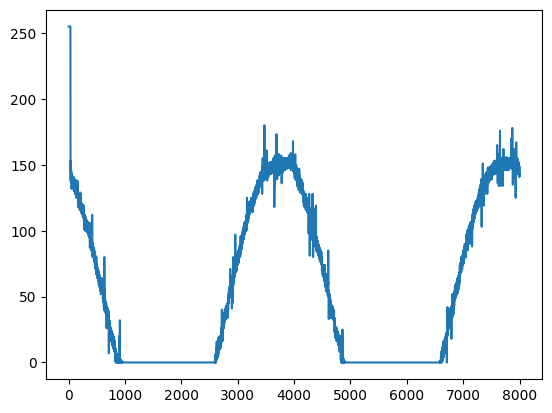

In [23]:
ser.write(bytearray('start\n','ascii'))
A = read()
ser.write(bytearray('read\n','ascii'))
A = read()
S = str(A[2])[2:].split(",")[:-1]
signal = [int(x,16) for x in S]
plt.plot(signal)

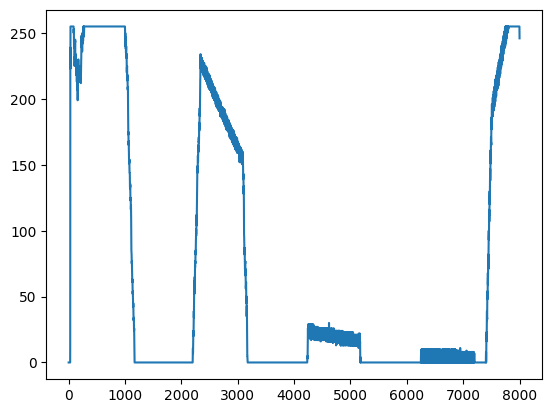

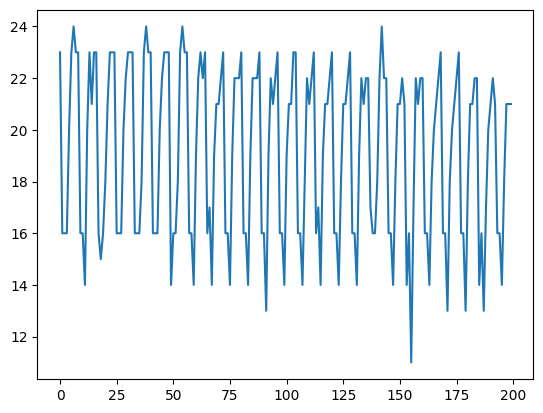

In [70]:
plt.plot(signal[4200:4400])